In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [4]:
df = pd.read_csv('data/text-preprocessing.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df[df['latitude'].isnull() == False]
df = df[df['latitude'].isna() == False]

df = df[df['longitude'].isnull() == False]
df = df[df['longitude'].isna() == False]

df = df[df['longitude'].isnull() == False]
df = df[df['country'] == "Indonesia"]

df = df.head(10)
df.head(5)

KeyError: 'country'

In [2]:
df = df[df['country'] == 'Indonesia'] 
len(df)

NameError: name 'df' is not defined

In [71]:
provinces = df['province'].unique()

column_names = ["province", "total"]
df_province = pd.DataFrame(columns = column_names)
provinces

array(['Jawa Barat', 'Kalimantan Timur', 'DKI Jakarta', 'Papua Tengah',
       'Kalimantan Utara', 'Banten', 'Jawa Tengah',
       'Kepulauan Bangka Belitung', 'Sulawesi Tengah', 'Bali', 'Jambi',
       'Jawa Timur', 'Daerah Istimewa Yogyakarta', 'Papua Barat',
       'Kepulauan Riau', 'Sumatera Barat', 'Sumatera Selatan', 'Riau',
       'Kalimantan Selatan', 'Sumatera Utara', 'Kalimantan Tengah',
       'Sulawesi Selatan', 'Aceh', 'Nusa Tenggara Barat', 'Lampung',
       'Kalimantan Barat', 'Nusa Tenggara Timur', 'Sulawesi Utara',
       'Sulawesi Barat', 'Sulawesi Tenggara', 'Maluku', 'Gorontalo',
       'Maluku Utara', 'Bengkulu', 'Papua Pegunungan', 'Papua',
       'Papua Selatan'], dtype=object)

In [72]:
result = []
for index, province in enumerate(provinces):
    temp = None
    # temp = df[df['province'].str.match(province)]
    temp = df[df['province'] == province] 
    df_province.loc[index+1] = [province, temp.shape[0]]


df_province
df_province.sort_values('total', ascending=False)

,province,total
3,DKI Jakarta,21278
2,Kalimantan Timur,12885
1,Jawa Barat,4737
12,Jawa Timur,2788
7,Jawa Tengah,1899
13,Daerah Istimewa Yogyakarta,1811
6,Banten,1311
20,Sumatera Utara,918
10,Bali,779
16,Sumatera Barat,556


In [73]:
df_province['total'].sum()

53521

In [74]:
path = './gadm36_IDN_1.json'
df_geo = gpd.read_file(path)
display(df_geo.head())


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


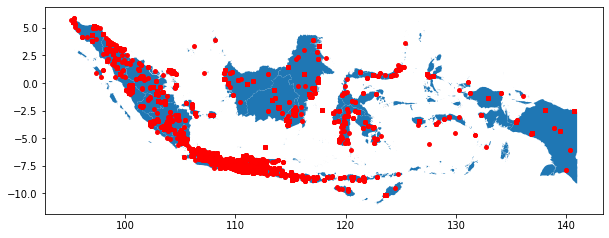

In [80]:
df.longitude = df.longitude.astype(float)
df.latitude = df.latitude.astype(float)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)  
gdf.plot(ax=df_geo.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<AxesSubplot:>

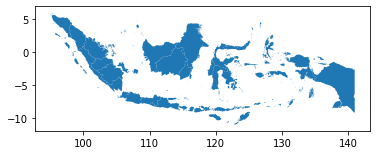

In [9]:
df_geo.plot()

In [79]:
df['longitude'].dtypes

dtype('O')